<a href="https://colab.research.google.com/github/mohan844/SVM_linear_classifier_US_airline_tweet/blob/main/Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: CoronaVirus Tweet Sentiment Analysis** 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member -** LALIT MOHAN

# **Project Summary -**

The problem at hand is to classify tweets related to the Corona Virus into different sentiment categories, such as positive, negative, or neutral, using machine learning algorithms. Two popular algorithms for classification are logistic regression and Naive Bayes, and the performance of each algorithm will be evaluated based on metrics such as accuracy, precision, recall, and auc-roc score.

To preprocess the text data, CountVectorizer and TF-IDF Vectorizer can be used to convert the tweets into a numeric format that can be easily used for training the classification models. CountVectorizer counts the frequency of each word in a document, while TF-IDF Vectorizer considers the frequency of the word across all documents.

By applying these vectorization techniques to preprocess the tweets, the text data can be converted into a numeric format that can be easily used for training the classification models. The performance of each algorithm using these vectorization techniques will be evaluated to determine which algorithm and vectorization technique works best for classifying Corona Virus Tweet Sentiments.

In [ ]:
# Import some lib:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Load the dataset:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Machine Learning/Capstone_Project: 3 Classification/Coronavirus Tweets.csv', encoding='latin-1')

In [ ]:
# Head into the data:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df['OriginalTweet'][0:10]

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
5    As news of the regionÂs first confirmed COVID...
6    Cashier at grocery store was sharing his insig...
7    Was at the supermarket today. Didn't buy toile...
8    Due to COVID-19 our retail store and classroom...
9    For corona prevention,we should stop to buy th...
Name: OriginalTweet, dtype: object

In [ ]:
df.shape

(41157, 6)

In [ ]:
# Check info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Unique value in each columns:
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [ ]:
# Total unique sentiments in sentiment column:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
# Creating a new column for sentiments of positive, Negative & Neutral:
df['new_sentiment'] = df['Sentiment'].replace(to_replace = ['Neutral','Positive','Extremely Negative','Negative','Extremely Positive'], value = ['Neutral','Positive','Negative','Negative','Positive'])

<Axes: >

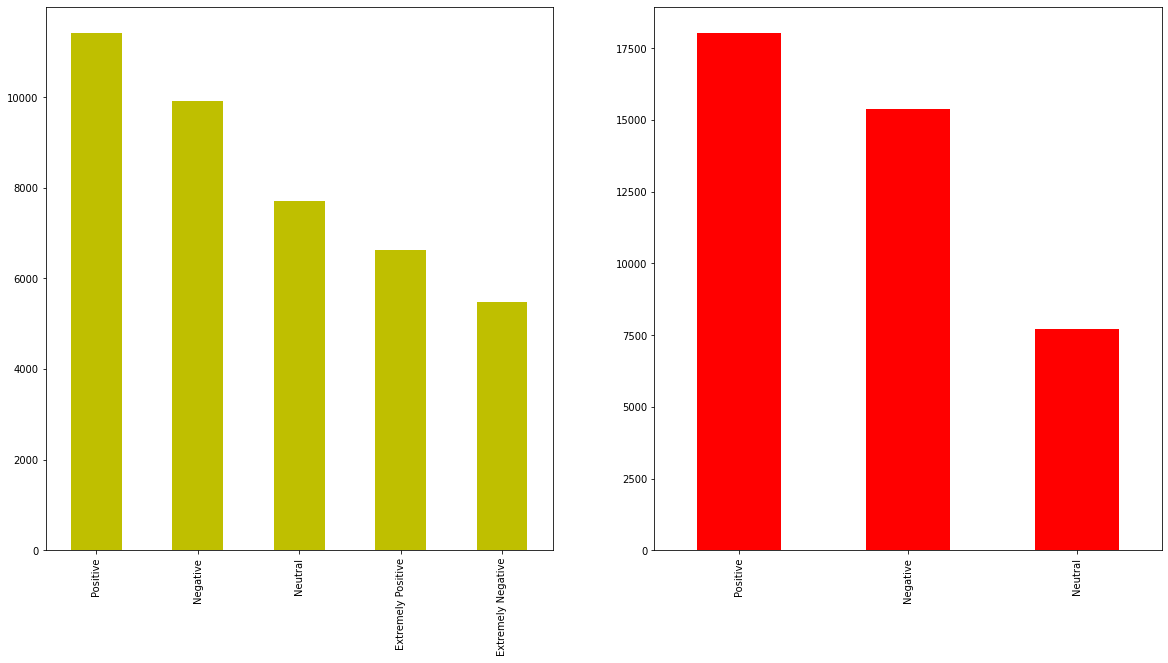

In [ ]:
# Plotting the all two graph of sentiments:
fig,axis = plt.subplots(1,2,figsize=(20,10))
df['Sentiment'].value_counts().plot(kind='bar', ax=axis[0], color='y')
df['new_sentiment'].value_counts().plot(kind='bar',ax=axis[1], color='r')

**From the graph we concluse that out of total data Positive reviews are 40%, 37% of negative reviews and 23% of Neutral Reviews.**

In [ ]:
# Converting the Date into proper format:
from datetime import datetime
df['TweetAt'] = df['TweetAt'].apply(lambda z: datetime.strptime(z,'%d-%m-%Y'))
df['week'] = df['TweetAt'].apply(lambda z:z.strftime("%A"))
df['month'] = df['TweetAt'].apply(lambda z:z.strftime("%B"))

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,new_sentiment,week,month
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Neutral,Monday,March
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,Positive,Monday,March
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Positive,Monday,March
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,Positive,Monday,March
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Negative,Monday,March


In [ ]:
# Extracting the Min & Max time from dataset:
max_time = df['TweetAt'].max()
min_time = df['TweetAt'].min()
print('Maximum time:', max_time)
print('Minimum time:', min_time)

Maximum time: 2020-04-14 00:00:00
Minimum time: 2020-03-16 00:00:00


In [ ]:
print('Total days of data:', max_time- min_time)

Total days of data: 29 days 00:00:00


**We have the data from 16th of march, 2020 to 14th of April, 2020 i.e 29 Days of Data.**

## Relation between dates and Tweets:








<Axes: xlabel='TweetAt'>

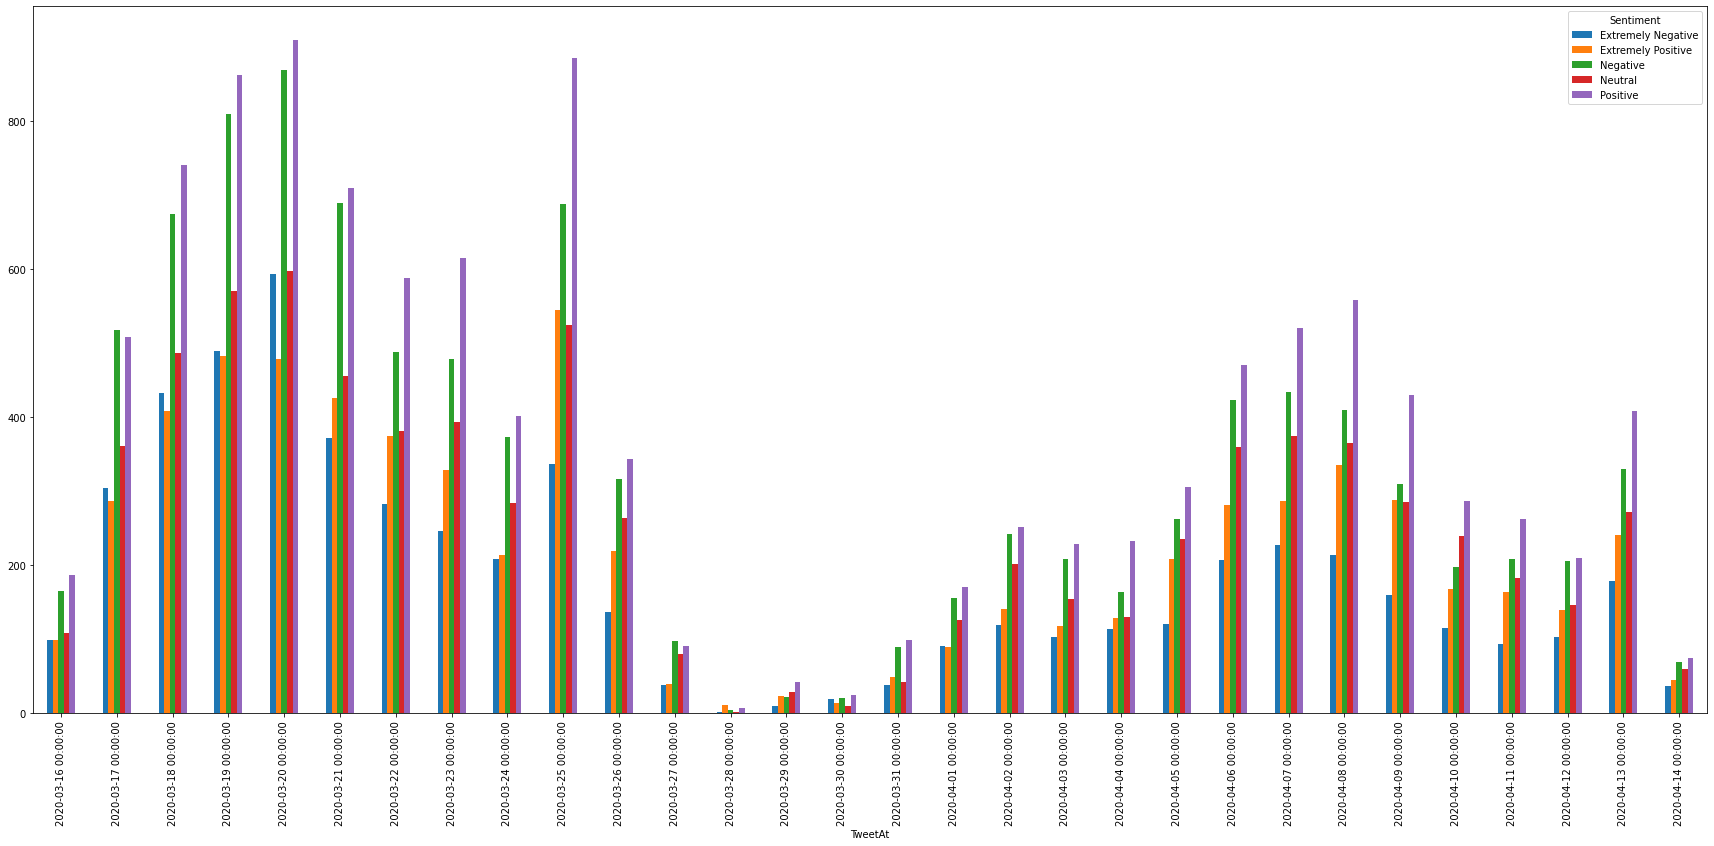

In [ ]:
df.groupby(['TweetAt','Sentiment'])['UserName'].count().unstack().plot(kind='bar',figsize=(30,13))

<Axes: xlabel='TweetAt'>

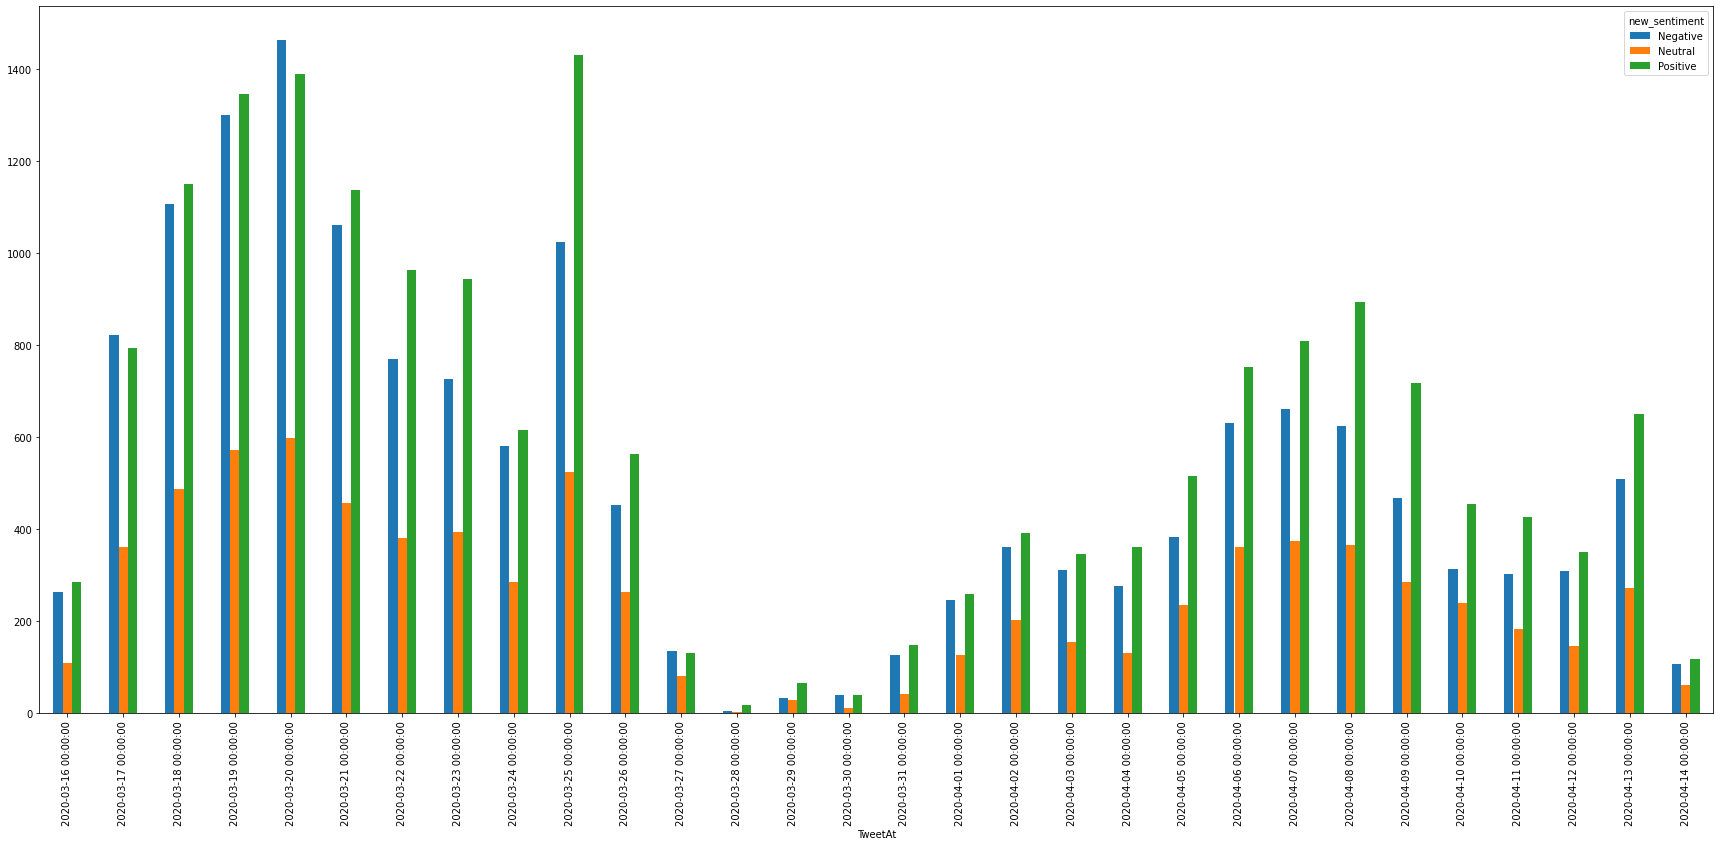

In [ ]:
df.groupby(['TweetAt','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',figsize=(30,13))

**We conclude that:**

*   Majority of days are ratted as positive as compared to negative. Except the date 2020-03-20.
*   We noted that at end of March no of Tweets are getting decreased, on otherhand beginning of April it goes on increased.

*   Density of Tweets in March are High as compared to April, which may be people are getting used to COVID-19.
  





## Relation between Week, Tweets and Sentiments:

ValueError: ignored

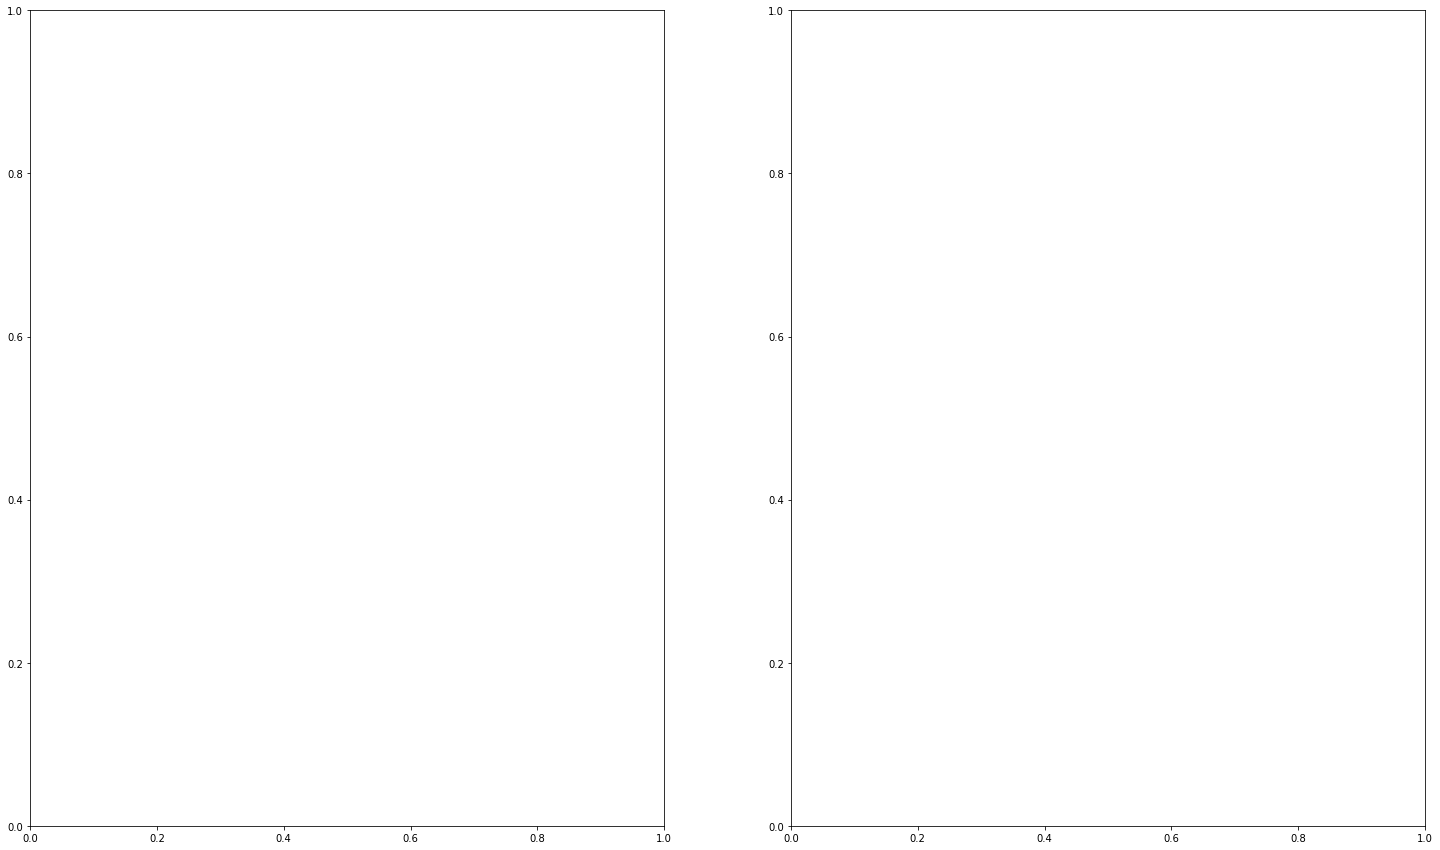

In [ ]:
# Plotting the count plots:
fig,axis = plt.subplots(1,2,figsize=(25,15))
sns.countplot(df['week'],ax=axis[0])
df.groupby(['week','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',ax=axis[1])

new_sentiment       week  Negative  Neutral  Positive  neg_ratio
0                 Friday      2221     1070      2317       0.40
1                 Monday      2165     1143      2667       0.36
2               Saturday      1643      769      1940       0.38
3                 Sunday      1492      790      1891       0.36
4               Thursday      2580     1320      3017       0.37
5                Tuesday      2297     1121      2482       0.39
6              Wednesday      3000     1500      3732       0.36


<Axes: xlabel='week', ylabel='neg_ratio'>

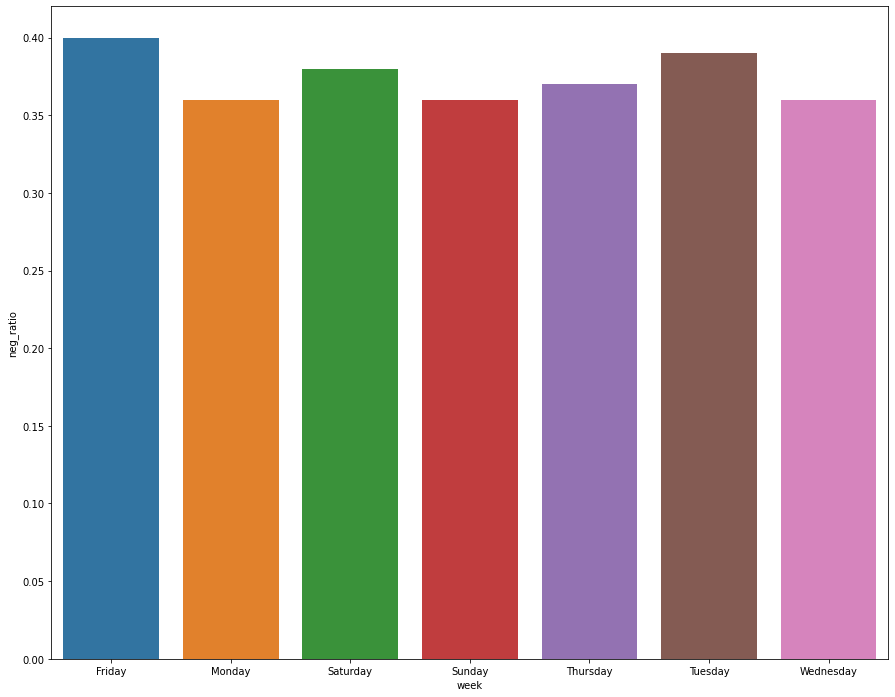

In [ ]:
# Plotting the graph for ratio of negative tweets to total tweets:
week = df.groupby(['week','new_sentiment'])['UserName'].count().unstack().reset_index()
week['neg_ratio'] = (week['Negative']/(week['Negative'] + week['Neutral'] + week['Positive'])).round(2)
print(week)
plt.figure(figsize=(15,12))
sns.barplot(data=week,x='week',y='neg_ratio')

**From the both graph we conclude that:**

*   Wednesday remains to be most tweeted day in the data, on other hand sunday has less density of tweets.
*   Wednesday have about more than 3500 positive tweets.
*   Friday has ratio of 0.4 of negative tweets to total tweets, which is most respective week day.




## Relation between Months,Tweets & Sentiments::



ValueError: ignored

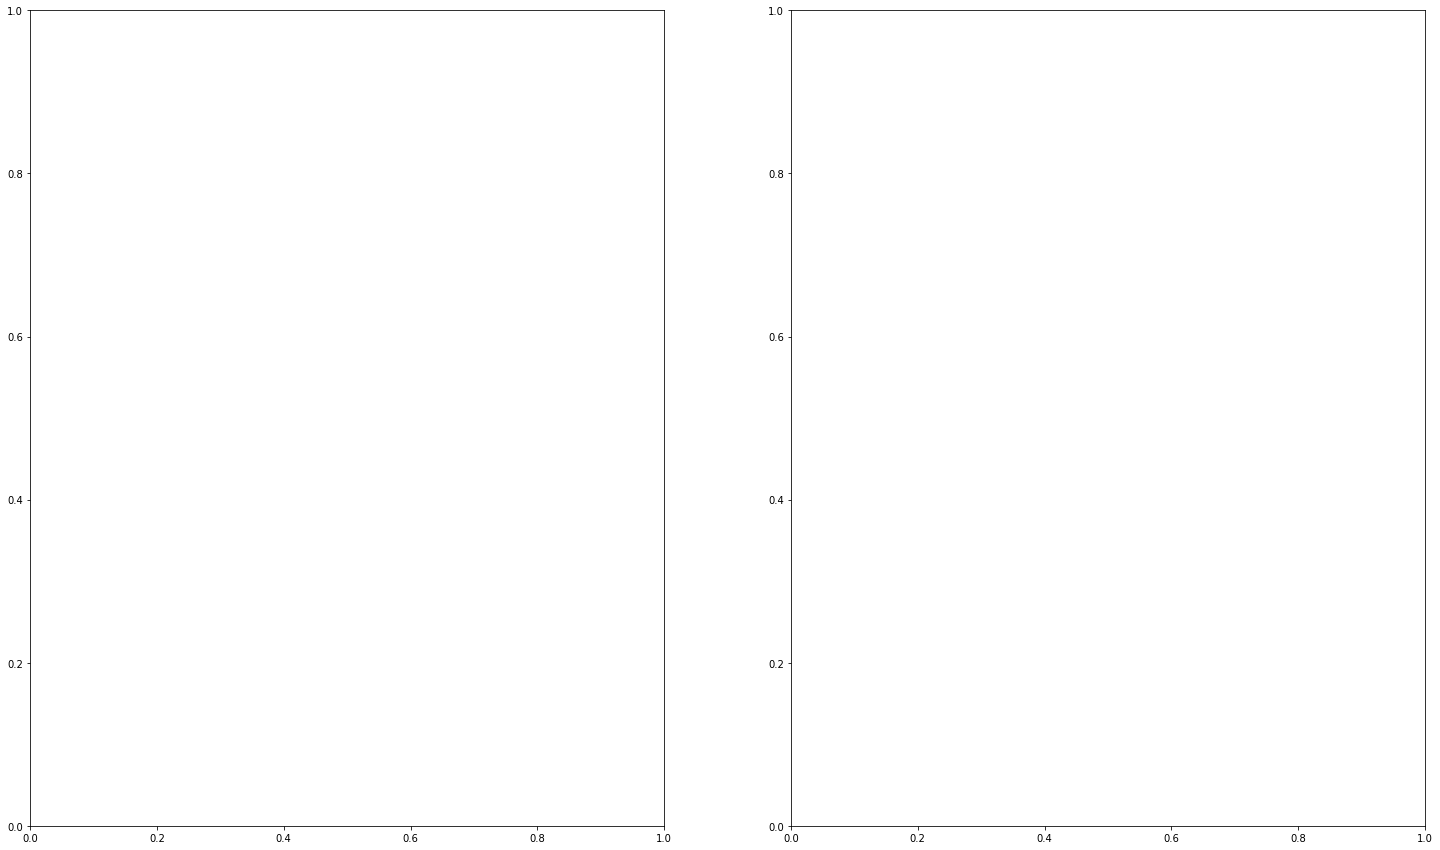

In [ ]:
# Ploting the count plot:
fig,axis = plt.subplots(1,2,figsize=(25,15))
sns.countplot(df['month'],ax=axis[0])
df.groupby(['month','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',ax=axis[1])

new_sentiment  month  Negative  Neutral  Positive  neg_ratio
0              April      5493     3127      7038       0.35
1              March      9905     4586     11008       0.39


<Axes: xlabel='month', ylabel='neg_ratio'>

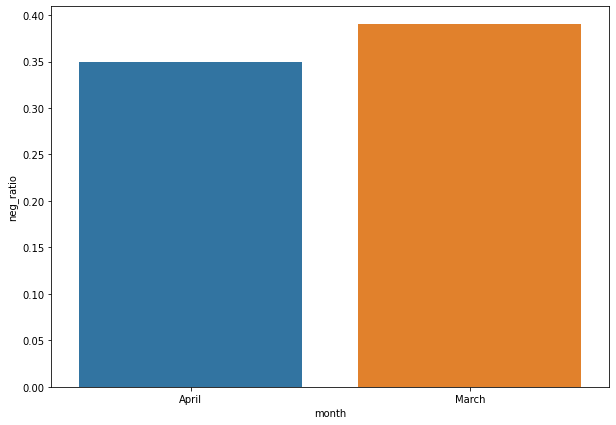

In [ ]:
# Ploting the graph for negative tweets to total tweets ratio:
month = df.groupby(['month','new_sentiment'])['UserName'].count().unstack().reset_index()
month['neg_ratio'] = (month['Negative']/(month['Negative'] + month['Neutral'] + month['Positive'])).round(2)
print(month)
plt.figure(figsize=(10,7))
sns.barplot(data=month,x='month',y='neg_ratio')

**Conclusion:**


*   As we seen in Date bar plot march is most tweeted month of about 62% of total tweets.
*   March have 64% of Negative of total negative, 60% of neutral of total neutral & 61% of positve of total positive tweets.
*   March and April has ratio of negative tweets to total tweets is 0.39 & 0.35 respectively.






## Realtion Between Location,Tweets & Sentiments:




In [ ]:
#df['Location'].value_counts()

**There are huge unique location on data set. Some are repeated in different format, some are null values, some are unknown string. So we have to arrange the location column data in proper format. So I'm going to use geocoders to segregate the location according to country name.**

In [ ]:
# Function to extract country name :
from geopy.geocoders import Nominatim
def country_name(address):
  try:
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(address)
    return location[0].split(',')[-1]
  except:
    return np.nan


In [ ]:
#df['country'] = df['Location'].apply(country_name)

In [ ]:
#len(df['country'].unique())

**There are 297 country's data in this Dataset. It is impossible to look at each country.So we do EDA for some top 7 countries**

In [ ]:
# get the frequency counts of each category
#category_counts = df['country'].value_counts()

# get the top 10 categories
#top_categories = category_counts.head(5)

# create a new DataFrame with only the rows that belong to the top 10 categories
#df_top_categories = df[df['country'].isin(top_categories.index)]

# plot a count plot for the top 10 categories using Seaborn
#plt.figure(figsize=(10,7))
#sns.countplot(data=df_top_categories, x='country')
#i=df_top_categories.groupby(['country'])['UserName'].count().to_frame().rename(columns={'UserName': 'total_count'})
#i['percent'] = i['total_count']/41157*100
#print(i)

In [ ]:
#df_top_categories.groupby(['country','new_sentiment'])['UserName'].count().unstack().plot(kind='bar',figsize=(10,7))

In [ ]:
final_df = df[df['new_sentiment'] != 'Neutral']

In [ ]:
final_df['new_sentiment'] = final_df['new_sentiment'].apply(lambda z: 1 if z=='Positive' else 0)

<ipython-input-28-dd6c2684070c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['new_sentiment'] = final_df['new_sentiment'].apply(lambda z: 1 if z=='Positive' else 0)


In [ ]:
final_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,new_sentiment,week,month
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,1,Monday,March
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,1,Monday,March
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,1,Monday,March
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0,Monday,March
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,1,Monday,March


## Applying the CountVectorization Meathod MultinomialNB and Logistic Regression:

In [ ]:
vectorizor = CountVectorizer(max_df = 0.9,min_df = 10)
X=vectorizor.fit_transform(final_df['OriginalTweet'])

In [ ]:
len(X.toarray()[1252])

6257

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,final_df['new_sentiment'],test_size=0.4,stratify=final_df['new_sentiment'])

In [ ]:
y_test.value_counts()

1    7219
0    6159
Name: new_sentiment, dtype: int64

In [ ]:
7219/(7219+6159)

0.5396172821049484

In [ ]:
y_train.value_counts()

1    10827
0     9239
Name: new_sentiment, dtype: int64

In [ ]:
10827/(10827+9239)

0.5395694209109937

In [ ]:
mnb_1 = MultinomialNB()
param_grid_1 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],'fit_prior': [True, False]}
grid_search_1 = GridSearchCV(mnb_1, param_grid_1, scoring='roc_auc', cv=5)

In [ ]:
grid_search_1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
print(grid_search_1.best_params_)

{'alpha': 2.0, 'fit_prior': True}


In [ ]:
y_test_pred_1 = grid_search_1.predict(x_test)

In [ ]:
confusion_matrix(y_test_pred_1,y_test)

array([[4731, 1495],
       [1428, 5724]])

In [ ]:
print(classification_report(y_test,y_test_pred_1))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      6159
           1       0.80      0.79      0.80      7219

    accuracy                           0.78     13378
   macro avg       0.78      0.78      0.78     13378
weighted avg       0.78      0.78      0.78     13378



In [ ]:
roc_score_cv_mn = roc_auc_score(y_test, grid_search_1.predict_proba(x_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_cv_mn.round(2))

ROC AUC score: 0.86


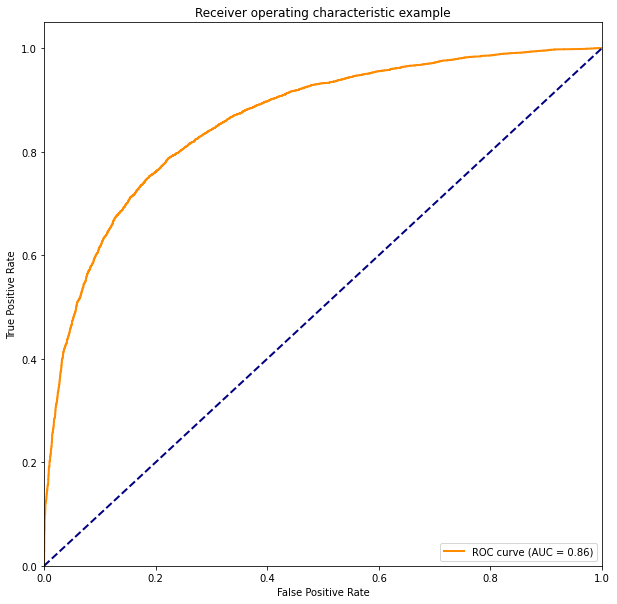

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,grid_search_1.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Now Apply Logistic Regression:

In [ ]:
log_reg = LogisticRegression()
param_grid_2 = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_2 = GridSearchCV(log_reg, param_grid=param_grid_2, scoring='roc_auc', cv=5)

In [ ]:
grid_search_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
print(grid_search_2.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
log_reg_cv_pred = grid_search_2.predict(x_test)

In [ ]:
print(classification_report(y_test,log_reg_cv_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6159
           1       0.89      0.89      0.89      7219

    accuracy                           0.88     13378
   macro avg       0.88      0.88      0.88     13378
weighted avg       0.88      0.88      0.88     13378



In [ ]:
confusion_matrix(log_reg_cv_pred,y_test)

array([[5349,  765],
       [ 810, 6454]])

In [ ]:
roc_score = roc_auc_score(y_test, grid_search_2.predict_proba(x_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score.round(2))

ROC AUC score: 0.94


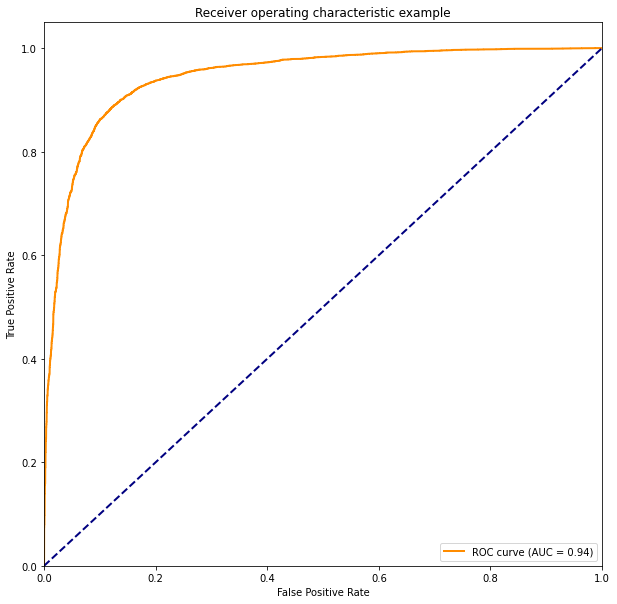

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,  grid_search_2.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Applying the TfidfVectorizer Meathod MultinomialNB and Logistic Regression:

In [ ]:
vectorizer_tv = TfidfVectorizer(max_df = 0.9,min_df = 10)
x = vectorizer_tv.fit_transform(final_df['OriginalTweet'])

In [ ]:
len(x.toarray()[1257])

6257

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,final_df['new_sentiment'],test_size=0.4,stratify=final_df['new_sentiment'])

In [ ]:
y_test.value_counts()

1    7219
0    6159
Name: new_sentiment, dtype: int64

In [ ]:
mnb_2 = MultinomialNB()
param_grid_3 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],'fit_prior': [True, False]}
grid_search_3 = GridSearchCV(mnb_2, param_grid_3, scoring='roc_auc', cv=5)

In [ ]:
grid_search_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
print(grid_search_3.best_params_)

{'alpha': 2.0, 'fit_prior': True}


In [ ]:
y_test_pred_tf = grid_search_3.predict(x_test)

In [ ]:
confusion_matrix(y_test_pred_tf,y_test)

array([[4241,  914],
       [1918, 6305]])

In [ ]:
print(classification_report(y_test,y_test_pred_tf))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      6159
           1       0.77      0.87      0.82      7219

    accuracy                           0.79     13378
   macro avg       0.79      0.78      0.78     13378
weighted avg       0.79      0.79      0.79     13378



In [ ]:
roc_score_tf_mn = roc_auc_score(y_test, grid_search_3.predict_proba(x_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_tf_mn.round(2))

ROC AUC score: 0.88


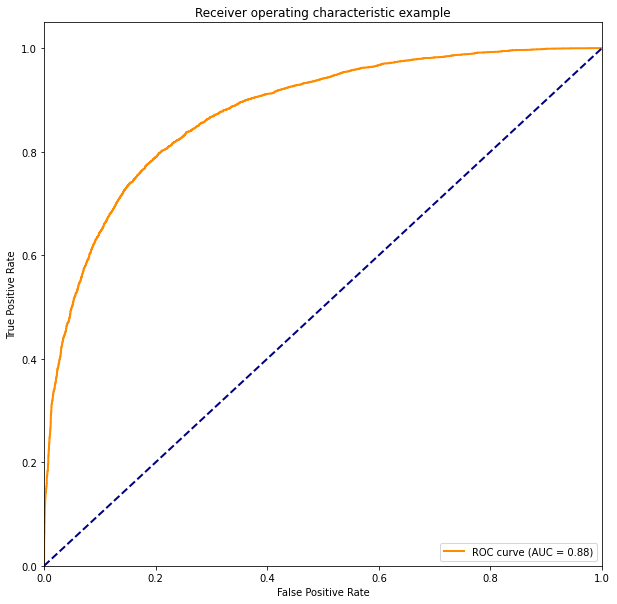

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,grid_search_3.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Now Apply Logistic Regression:

In [ ]:
log_reg = LogisticRegression()
param_grid_4 = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_4 = GridSearchCV(log_reg, param_grid=param_grid_4, scoring='roc_auc', cv=5)

In [ ]:
grid_search_4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
print(grid_search_4.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
log_reg_tf_pred = grid_search_4.predict(x_test)

In [ ]:
print(classification_report(y_test,log_reg_tf_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6159
           1       0.88      0.88      0.88      7219

    accuracy                           0.87     13378
   macro avg       0.87      0.87      0.87     13378
weighted avg       0.87      0.87      0.87     13378



In [ ]:
confusion_matrix(log_reg_tf_pred,y_test)

array([[5252,  854],
       [ 907, 6365]])

In [ ]:
roc_score_tf = roc_auc_score(y_test, grid_search_4.predict_proba(x_test)[:, 1])

In [ ]:
print("ROC AUC score:", roc_score_tf.round(2))

ROC AUC score: 0.94


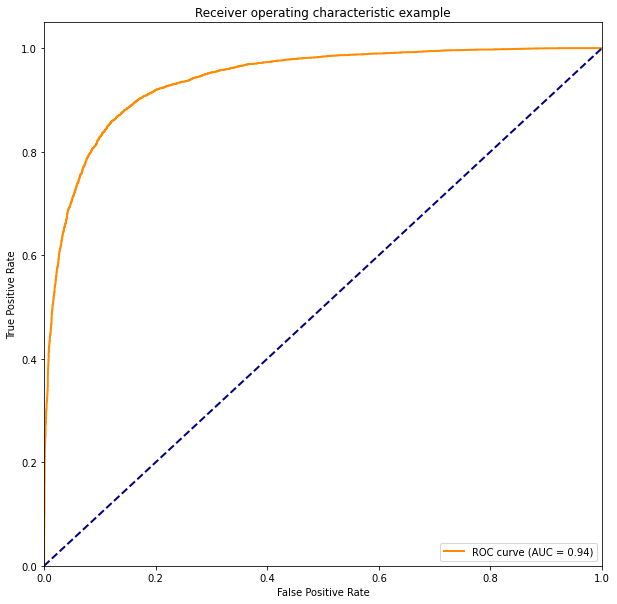

In [ ]:
# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,  grid_search_4.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()